In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
# Load Train data from our github repo
url_train = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train.csv'
dataDF_train = pd.read_csv(url_train)

# Load Train label data from our github repo
url_train_labels = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train_labels.csv'
dataDF_train_labels = pd.read_csv(url_train_labels)

In [18]:
# drop indices 
dataDF_train = dataDF_train.drop("Unnamed: 0", axis = 1)
dataDF_train_labels = dataDF_train_labels.drop("Unnamed: 0", axis = 1)

In [19]:
# reshape input to be 3D [samples, timesteps, features]
dataDF_train = dataDF_train.to_numpy()
dataDF_train_labels = dataDF_train_labels.to_numpy()

dataDF_train = dataDF_train.reshape((dataDF_train.shape[0], 1, dataDF_train.shape[1]))

In [20]:
# split data into training and test
X_train, X_valid, y_train, y_valid = train_test_split(dataDF_train, dataDF_train_labels, test_size=0.25, random_state=1)

In [21]:
# use functional API of tensorflow to generate model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(200))
model.add(tf.keras.layers.Dense(1))

In [22]:
# use the functional API to compile our model with a Mean Squared Error as a loss function
# and using the optimizer Adam with a learning rate of 0.01
model.compile(loss='mse',
                metrics=[tf.keras.metrics.RootMeanSquaredError()],
                optimizer=tf.keras.optimizers.Adam(0.01))

In [23]:
# train our model using the functional API 
# we train for 200 epochs
history = model.fit(
    X_train, y_train,
    batch_size = 64,
    epochs=100,
    validation_data=(X_valid, y_valid),
    verbose=1,
    shuffle = False,
    validation_split = 0.1
    )

Epoch 1/100
193/193 [==============================] - 4s 8ms/step - loss: 2599.0923 - root_mean_squared_error: 50.9813 - val_loss: 2182.1641 - val_root_mean_squared_error: 46.7136
Epoch 2/100
193/193 [==============================] - 1s 5ms/step - loss: 2297.1787 - root_mean_squared_error: 47.9289 - val_loss: 2095.7234 - val_root_mean_squared_error: 45.7791
Epoch 3/100
193/193 [==============================] - 1s 5ms/step - loss: 2198.1731 - root_mean_squared_error: 46.8847 - val_loss: 1997.0581 - val_root_mean_squared_error: 44.6885
Epoch 4/100
193/193 [==============================] - 1s 5ms/step - loss: 2062.8540 - root_mean_squared_error: 45.4187 - val_loss: 1810.4681 - val_root_mean_squared_error: 42.5496
Epoch 5/100
193/193 [==============================] - 1s 5ms/step - loss: 1807.9912 - root_mean_squared_error: 42.5205 - val_loss: 1534.1442 - val_root_mean_squared_error: 39.1682
Epoch 6/100
193/193 [==============================] - 1s 5ms/step - loss: 1571.7906 - root_mea

In [24]:
# function to plot the losses of our model
def plot_loss(history):
  plt.plot(np.sqrt(history.history['loss']), label='loss')
  plt.plot(np.sqrt(history.history['val_loss']), label='val_loss')
  plt.title('Basic LSTM - Data shuffled - No Location ')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.ylim(25,60)
  plt.legend()
  plt.grid(True)

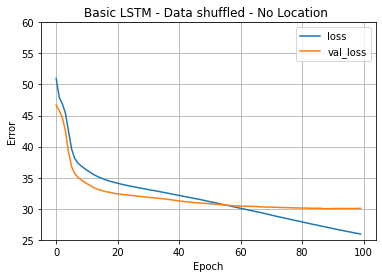

In [25]:
plot_loss(history)